# Predicting Employee Attrition

In recent years, attention has increasingly been paid to human resources (HR), since worker quality and skills represent a growth factor and a real competitive advantage for companies. After proving its mettle in sales and marketing, artificial intelligence is also becoming central to employee-related decisions within HR management. Organizational growth largely depends on staff retention. Losing employees frequently impacts the morale of the organization and hiring new employees is more expensive than retaining existing ones. 

You are working as a data scientist with HR Department of a large insurance company focused on sales team attrition. Insurance sales teams help insurance companies generate new business by contacting potential customers and selling one or more types of insurance. The department generally sees high attrition and thus staffing becomes a crucial aspect. 

To aid staffing, you are provided with the monthly information for a segment of employees for 2016 and 2017 and tasked to predict whether a current employee will be leaving the organization in the upcoming two quarters (01 Jan 2018 - 01 July 2018) or not, given:


1. Demographics of the employee (city, age, gender etc.)
2. Tenure information (joining date, Last Date)
3. Historical data regarding the performance of the employee (Quarterly rating, Monthly business acquired, designation, salary)

In [1]:
# Lets import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import metrics

In [2]:
# lets take whole dataset into a dataframe and term it as raw dataframe coz it hasnt been cleaned
df_raw = pd.read_csv("train.csv")
df_raw.shape

(19104, 13)

In [3]:
df_raw.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [4]:
df_raw.tail()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2
19103,2017-12-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,411480,2


# Exploratory Data Analysis

In [5]:
# get the information of data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [6]:
# only "LastWorkingDate" has some Null entries we will look into them later on
# We have 7 numerical features
# 6 categorical features
# Target Feature ===> not specified, i.e we will have to create it on our own in dataset formatting


In [7]:
df_raw.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [8]:
# Lets look at value count of each feature
def value_count(df):
    for var in df.columns:
        print("===============================")
        print(var)
        print("===============================")
        print(df[var].value_counts())
        print("-----------------------------------------------------------------------------")

In [9]:
value_count(df_raw)

MMM-YY
2016-01-01    1022
2016-02-01     944
2016-03-01     870
2017-12-01     819
2017-10-01     818
2017-08-01     812
2017-09-01     809
2017-07-01     806
2017-11-01     805
2016-12-01     795
2016-04-01     794
2017-01-01     782
2016-11-01     781
2017-06-01     770
2017-05-01     766
2016-05-01     764
2016-09-01     762
2017-02-01     761
2016-07-01     757
2016-08-01     754
2016-10-01     739
2017-04-01     729
2016-06-01     726
2017-03-01     719
Name: MMM-YY, dtype: int64
-----------------------------------------------------------------------------
Emp_ID
2049    24
1191    24
1655    24
926     24
1623    24
        ..
1448     1
748      1
930      1
962      1
1194     1
Name: Emp_ID, Length: 2381, dtype: int64
-----------------------------------------------------------------------------
Age
36    1283
33    1250
34    1234
32    1150
30    1146
35    1138
31    1090
29    1013
37     862
38     854
39     788
28     772
27     752
40     706
41     661
26     583
42   

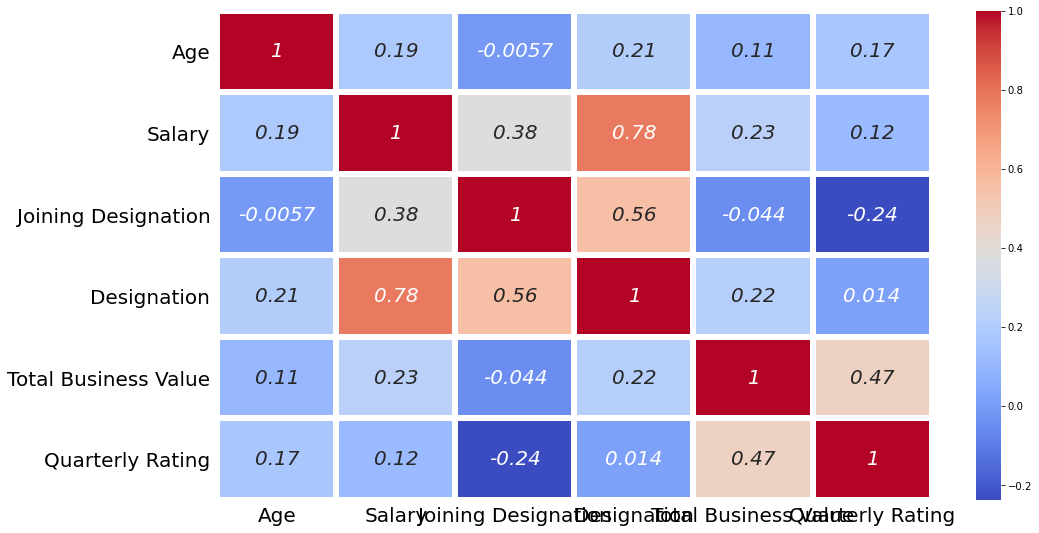

In [10]:
# correlation heatmap
# for correaltion heatmap lets take the numerical features in one variable list "num_vars"
num_vars = ["Age", "Salary", "Joining Designation", "Designation", 
            "Total Business Value", "Quarterly Rating"]
plt.figure(figsize=(16,9))
annot_kws = {'fontsize':20,'fontstyle':'italic'}
hmap = sns.heatmap(df_raw[num_vars].corr(),cmap="coolwarm", annot=True,linewidth = 5,annot_kws=annot_kws)
hmap.tick_params(color = 'w',labelsize = 20, )
plt.show()

In [11]:
# we can see "Total Business Value" and "Quarterly Rating" are quite related to each other
# we can check the correlation again after dataset formatting with our tenure target

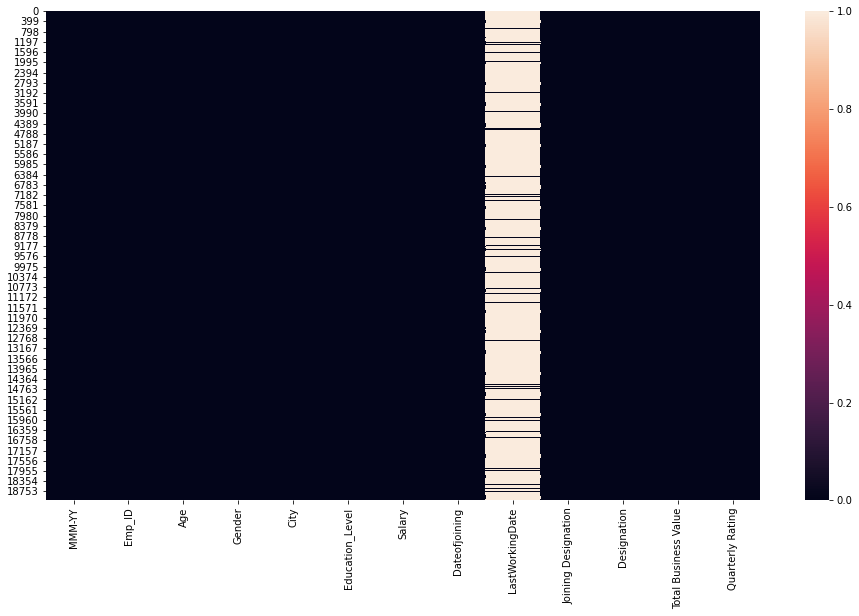

In [12]:
# visualize missing value using heatmap to get idea where is the value missing
# white represents the null value

plt.figure(figsize=(16,9))
sns.heatmap(df_raw.isnull())
plt.show()

In [13]:
# represents "LastWorkingDate" is the only feature which has NaN entries in it so we'll  try to handle it

## DataSet Formatting, Feature engineering & Visualization

In [14]:
# Basically the problem is we are having multiple entries of empid during his whole period acc. to months
# so we will try convert these multiple rows to one single row of each empid
# So we ll do all these in new dataframe
# take single empid
# take int mean of age 
# take 1st occurance of gender for each empid
# take 1st occurance of city for each empid
# take 1st occurance of education level for each empid
# take 1st occurance of salary for each empid as start salary
# take last occurance of salary for each empid as end salary
# take 1st occurance of Dateofjoining for each empid
# take last occurance of LastWorkingDate for each empid as all would be NaN/NaT
# there would be some cases where we would have NaT i.e LastWorkingDate not present
# we will us MMM-YY of last occurance and add 15 days consider it as our LastWorkingDate
# take 1st occurance of Joining Designation for each empid
# take 1st occurance of Designation for each empid
# take sum of positive business value and make a new feature new_Total_pos_bv for each empid
# take sum of negative business value and make a new feature new_Total_neg_bv for each empid
# take mode of Quarterly Rating for each empid

In [15]:
empid = np.array(df_raw["Emp_ID"].to_list())
empid = np.unique(empid)
empid

array([   1,    2,    4, ..., 2786, 2787, 2788])

In [16]:
# to show all the columns and rows in dataFrame
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [17]:
# lets convert the data types of dates feature to datetime from object
df_raw['Dateofjoining']= pd.to_datetime(df_raw['Dateofjoining'])
df_raw['LastWorkingDate']= pd.to_datetime(df_raw['LastWorkingDate'])
df_raw['MMM-YY']= pd.to_datetime(df_raw['MMM-YY'])

In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Emp_ID                19104 non-null  int64         
 2   Age                   19104 non-null  int64         
 3   Gender                19104 non-null  object        
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  object        
 6   Salary                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Designation           19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [19]:
New_raw_df = pd.DataFrame()

In [20]:
new_emp_id = []
new_Age = []
new_Gender = []
new_City = []
new_Education_Level = []
new_Start_Salary = []
new_End_Salary = []
new_Dateofjoining = []
new_LastWorkingDate = []
new_Joining_Designation = []
new_Designation = []
new_Total_pos_bv = []
new_Total_neg_bv = []
new_overall_Rating = []
for current_emp_id, current_sub_df in df_raw.groupby("Emp_ID"):
    new_emp_id.append(current_emp_id)
    
    new_Age.append(int(np.mean(current_sub_df["Age"].values)))
    
    new_Gender.append(current_sub_df["Gender"].values[0])
    
    new_City.append(current_sub_df["City"].values[0])
    
    new_Education_Level.append(current_sub_df["Education_Level"].values[0])
    
    new_Start_Salary.append(current_sub_df["Salary"].values[0])    
    
    new_End_Salary.append(current_sub_df["Salary"].values[-1])
    
    new_Dateofjoining.append(current_sub_df["Dateofjoining"].values[0])
    
    lwd = current_sub_df["LastWorkingDate"].values[-1]
    if np.isnat(lwd):
        print("last working date was not provided in dataset for", current_emp_id)
        new_lwd = current_sub_df["MMM-YY"].values[-1] + np.timedelta64(15,'D')
        print(new_lwd,"changed")
        new_LastWorkingDate.append(new_lwd)
    else:
        new_LastWorkingDate.append(lwd)
    
    new_Joining_Designation.append(current_sub_df["Joining Designation"].values[0])
    
    new_Designation.append(current_sub_df["Designation"].values[0])
    
    bvlist = current_sub_df["Total Business Value"].values
    sumofpos_bv = 0
    sumofneg_bv = 0
    for i in bvlist:
        if i >= 0:
            sumofpos_bv = sumofpos_bv + i
        else:
            sumofneg_bv = sumofneg_bv + i
    
    new_Total_pos_bv.append(sumofpos_bv)
    
    new_Total_neg_bv.append(sumofneg_bv)
    
    new_overall_Rating.append(current_sub_df["Quarterly Rating"].value_counts().index[0])
    
    
    
print("new data features have been created")

last working date was not provided in dataset for 2
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 6
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 11
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 14
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 25
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 26
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 31
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 39
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 41
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 45
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 47
2017-12-16T00:00:00.000000000 changed
l

last working date was not provided in dataset for 449
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 450
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 453
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 457
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 458
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 459
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 462
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 472
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 483
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 493
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 494
2017-12-16T00:00:00.000000

last working date was not provided in dataset for 906
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 913
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 920
2016-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 926
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 933
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 936
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 943
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 945
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 946
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 952
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 954
2017-12-16T00:00:00.000000

last working date was not provided in dataset for 1370
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1372
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1374
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1379
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1381
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1382
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1393
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1399
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1401
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1405
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1412
2017-12-16T00:0

last working date was not provided in dataset for 1836
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1837
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1839
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1840
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1841
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1852
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1858
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1859
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1864
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1869
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 1871
2017-12-16T00:0

last working date was not provided in dataset for 2289
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2290
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2298
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2299
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2307
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2308
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2311
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2314
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2318
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2322
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2331
2017-12-16T00:0

last working date was not provided in dataset for 2761
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2763
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2764
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2770
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2771
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2775
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2778
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2781
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2784
2017-12-16T00:00:00.000000000 changed
last working date was not provided in dataset for 2788
2017-12-16T00:00:00.000000000 changed
new data features have been created


In [21]:
# adding new values to dataframe
New_raw_df["emp_id"] = new_emp_id
New_raw_df["Age"] = new_Age
New_raw_df["Gender"] = new_Gender
New_raw_df["City"] = new_City
New_raw_df["Education_Level"] = new_Education_Level
New_raw_df["Start_Salary"] = new_Start_Salary
New_raw_df["End_Salary"] = new_End_Salary
New_raw_df["Dateofjoining"] = new_Dateofjoining
New_raw_df["LastWorkingDate"] = new_LastWorkingDate
New_raw_df["Joining_Designation"] = new_Joining_Designation
New_raw_df["Designation"] = new_Designation
New_raw_df["Total_pos_bv"] = new_Total_pos_bv
New_raw_df["Total_neg_bv"] = new_Total_neg_bv
New_raw_df["overall_Rating"] = new_overall_Rating

In [22]:
New_raw_df.head()

,emp_id,Age,Gender,City,Education_Level,Start_Salary,End_Salary,Dateofjoining,LastWorkingDate,Joining_Designation,Designation,Total_pos_bv,Total_neg_bv,overall_Rating
0,1,28,Male,C23,Master,57387,57387,2015-12-24,2016-03-11,1,1,2381060,-665480,2
1,2,31,Male,C7,Master,67016,67016,2017-11-06,2017-12-16,2,2,0,0,1
2,4,43,Male,C13,Master,65603,65603,2016-12-07,2017-04-27,2,2,350000,0,1
3,5,29,Male,C9,College,46368,46368,2016-01-09,2016-03-07,1,1,120360,0,1
4,6,31,Female,C11,Bachelor,78728,78728,2017-07-31,2017-12-16,3,3,1265000,0,2


In [23]:
# lets make the target tenure feature
tenure_in_days = New_raw_df["LastWorkingDate"] - New_raw_df["Dateofjoining"]
tenure_in_days_int = []
for i in tenure_in_days:
    tenure_in_days_int.append(i.days)
New_raw_df["Tenure_in_days"] = tenure_in_days_int

In [24]:
New_raw_df.head()

,emp_id,Age,Gender,City,Education_Level,Start_Salary,End_Salary,Dateofjoining,LastWorkingDate,Joining_Designation,Designation,Total_pos_bv,Total_neg_bv,overall_Rating,Tenure_in_days
0,1,28,Male,C23,Master,57387,57387,2015-12-24,2016-03-11,1,1,2381060,-665480,2,78
1,2,31,Male,C7,Master,67016,67016,2017-11-06,2017-12-16,2,2,0,0,1,40
2,4,43,Male,C13,Master,65603,65603,2016-12-07,2017-04-27,2,2,350000,0,1,141
3,5,29,Male,C9,College,46368,46368,2016-01-09,2016-03-07,1,1,120360,0,1,58
4,6,31,Female,C11,Bachelor,78728,78728,2017-07-31,2017-12-16,3,3,1265000,0,2,138


In [25]:
# clearly is no NaN in the dataframe we formed
New_raw_df.isnull().sum().sum()

0

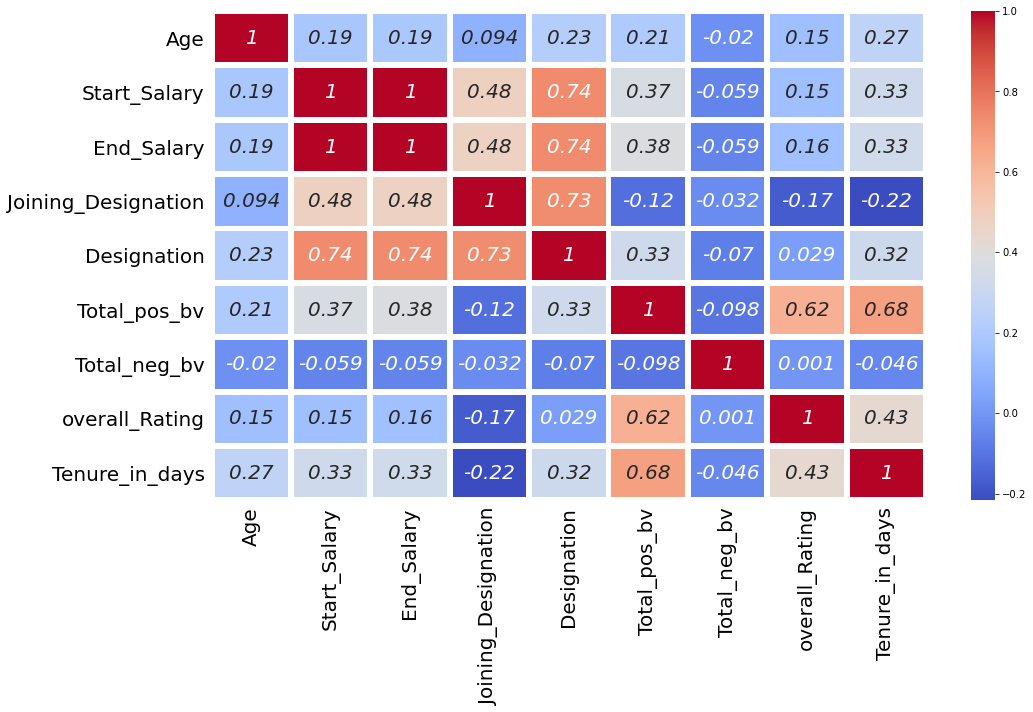

In [26]:
# correlation heatmap
# for correaltion heatmap lets take the numerical features in one variable list "num_vars"
num_vars = ["Age", "Start_Salary" ,"End_Salary", "Joining_Designation", "Designation", 
            "Total_pos_bv" ,"Total_neg_bv" ,"overall_Rating","Tenure_in_days"]
plt.figure(figsize=(16,9))
annot_kws = {'fontsize':20,'fontstyle':'italic'}
hmap = sns.heatmap(New_raw_df[num_vars].corr(),cmap="coolwarm", annot=True,linewidth = 5,annot_kws=annot_kws)
hmap.tick_params(color = 'w',labelsize = 20, )
plt.show()

In [27]:
# on looking the correlation of other features with target Tenure_in_days
# we can see "Start_Salary" ,"End_Salary" have same correlation effect on target
# but the thing is we have already reduced so many rows 
# and there are still some people who had grace and whose ending salary is different from start salary
# Lastly total positive business value has great impact as we can see
# also overall rating also has impact over Tenure_in_days

In [28]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* Age *******


C:\Users\vigya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


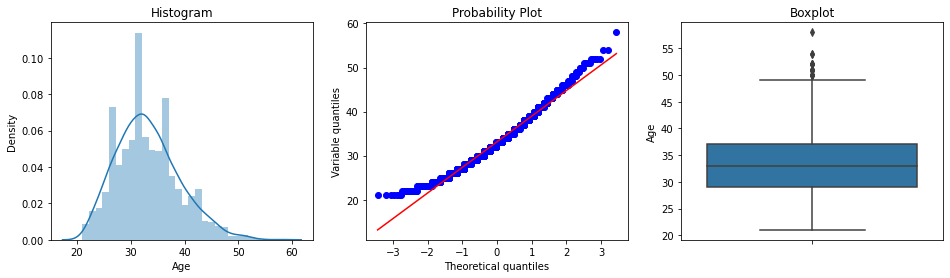

******* Start_Salary *******


C:\Users\vigya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


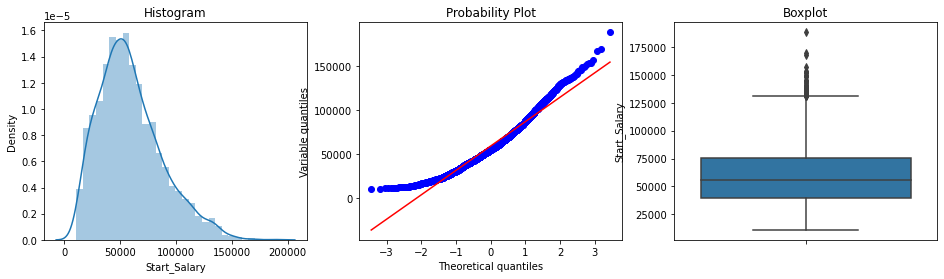

******* Joining_Designation *******


C:\Users\vigya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


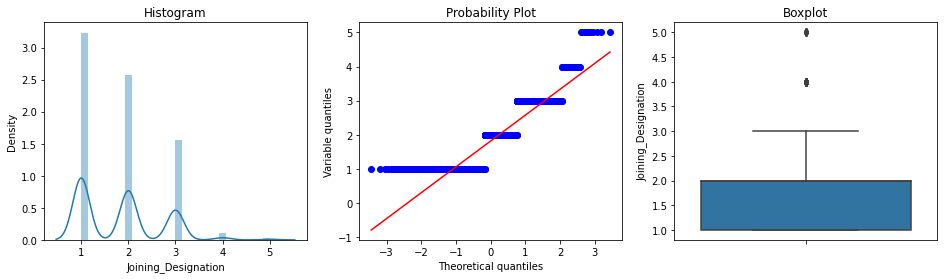

******* Designation *******


C:\Users\vigya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


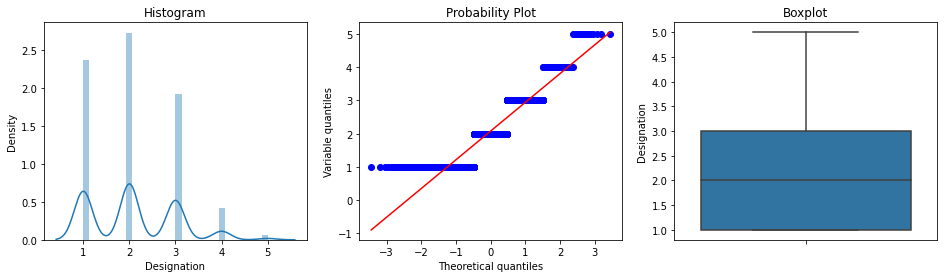

******* overall_Rating *******


C:\Users\vigya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


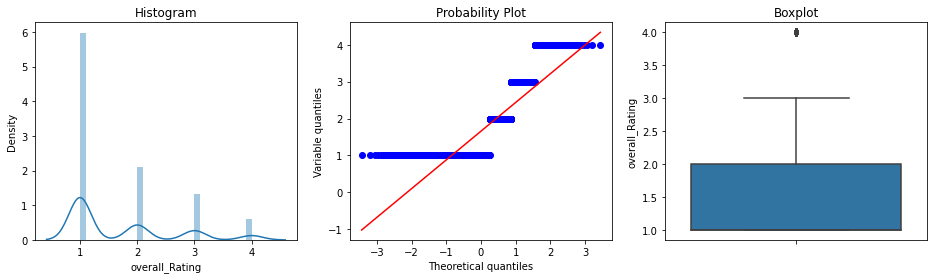

In [29]:
num_var = ["Age", "Start_Salary" , "Joining_Designation", "Designation","overall_Rating"]
for var in num_var:
    print("******* {} *******".format(var))
    diagnostic_plots(New_raw_df, var)

# here we observe outlier using histogram,, qq plot and boxplot

In [30]:
# we can see some outliers in Age boxplot but age of max -> 58 is also very normal
# salary is quite normally distributed
# Joining_Designation is showing some outliers also but it it saying that value 5 are outliers 
# same is the case with overall_Rating it is also saying 5 is outlier because of less frequency
# Designation has no outliers present

In [31]:
New_raw_df.describe()

,emp_id,Age,Start_Salary,End_Salary,Joining_Designation,Designation,Total_pos_bv,Total_neg_bv,overall_Rating,Tenure_in_days
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03,2.381000e+03,2381.000000,2381.000000
mean,1397.559009,33.149517,59209.060899,59334.157077,1.820244,2.078538,4.617558e+06,-3.081656e+04,1.655187,429.384712
std,806.161628,5.868473,28275.899087,28383.666384,0.841433,0.931321,9.149651e+06,2.694899e+05,0.923982,565.649675
min,1.000000,21.000000,10747.000000,10747.000000,1.000000,1.000000,0.000000e+00,-7.092130e+06,1.000000,-12.000000
25%,695.000000,29.000000,39104.000000,39104.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,95.000000
50%,1400.000000,33.000000,55276.000000,55315.000000,2.000000,2.000000,8.662700e+05,0.000000e+00,1.000000,183.000000
75%,2100.000000,37.000000,75765.000000,75986.000000,2.000000,3.000000,4.235570e+06,0.000000e+00,2.000000,474.000000
max,2788.000000,58.000000,188418.000000,188418.000000,5.000000,5.000000,9.663590e+07,0.000000e+00,4.000000,2816.000000


## Categorical Variable Encoding

In [32]:
cat_enc_df = New_raw_df.copy()

In [33]:
cat_enc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   emp_id               2381 non-null   int64         
 1   Age                  2381 non-null   int64         
 2   Gender               2381 non-null   object        
 3   City                 2381 non-null   object        
 4   Education_Level      2381 non-null   object        
 5   Start_Salary         2381 non-null   int64         
 6   End_Salary           2381 non-null   int64         
 7   Dateofjoining        2381 non-null   datetime64[ns]
 8   LastWorkingDate      2381 non-null   datetime64[ns]
 9   Joining_Designation  2381 non-null   int64         
 10  Designation          2381 non-null   int64         
 11  Total_pos_bv         2381 non-null   int64         
 12  Total_neg_bv         2381 non-null   int64         
 13  overall_Rating       2381 non-nul

In [34]:
# so we have 3 categorical features for which we need to do encoding
# Before that lets make a new feature "Grace_in_salary" and remove "End_Salary"
# because "Grace_in_salary" = "End_Salary" - "Start_Salary"
# also as we have fetched new target feature "Tenure_in_days"
# there is no need of "Dateofjoining","LastWorkingDate" also : so we'll remove them also 

In [35]:
cat_enc_df["Grace_in_salary"] = cat_enc_df["End_Salary"] - cat_enc_df["Start_Salary"]

In [36]:
cat_enc_df.drop(["Dateofjoining","LastWorkingDate","End_Salary"],inplace = True, axis = 1)

In [37]:
cat_enc_df.head()

,emp_id,Age,Gender,City,Education_Level,Start_Salary,Joining_Designation,Designation,Total_pos_bv,Total_neg_bv,overall_Rating,Tenure_in_days,Grace_in_salary
0,1,28,Male,C23,Master,57387,1,1,2381060,-665480,2,78,0
1,2,31,Male,C7,Master,67016,2,2,0,0,1,40,0
2,4,43,Male,C13,Master,65603,2,2,350000,0,1,141,0
3,5,29,Male,C9,College,46368,1,1,120360,0,1,58,0
4,6,31,Female,C11,Bachelor,78728,3,3,1265000,0,2,138,0


In [38]:
# Now lets perform categorical variable encoding over the 3 categorical features
# we can perform dummy encoding over the two features Gender and City and drop 1st
# on Education_Level we will have to perform label encoding

In [39]:
cat_enc_df = pd.get_dummies(cat_enc_df,drop_first=True,columns=['Gender','City'])

In [40]:
ord_label = {"College" : 1,"Bachelor": 2,"Master": 3}
cat_enc_df["Education_Level"] = cat_enc_df['Education_Level'].map(ord_label)

In [41]:
cat_enc_df.head()

,emp_id,Age,Education_Level,Start_Salary,Joining_Designation,Designation,Total_pos_bv,Total_neg_bv,overall_Rating,Tenure_in_days,Grace_in_salary,Gender_Male,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,28,3,57387,1,1,2381060,-665480,2,78,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,31,3,67016,2,2,0,0,1,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,43,3,65603,2,2,350000,0,1,141,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,29,1,46368,1,1,120360,0,1,58,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6,31,2,78728,3,3,1265000,0,2,138,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
cat_enc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   emp_id               2381 non-null   int64
 1   Age                  2381 non-null   int64
 2   Education_Level      2381 non-null   int64
 3   Start_Salary         2381 non-null   int64
 4   Joining_Designation  2381 non-null   int64
 5   Designation          2381 non-null   int64
 6   Total_pos_bv         2381 non-null   int64
 7   Total_neg_bv         2381 non-null   int64
 8   overall_Rating       2381 non-null   int64
 9   Tenure_in_days       2381 non-null   int64
 10  Grace_in_salary      2381 non-null   int64
 11  Gender_Male          2381 non-null   uint8
 12  City_C10             2381 non-null   uint8
 13  City_C11             2381 non-null   uint8
 14  City_C12             2381 non-null   uint8
 15  City_C13             2381 non-null   uint8
 16  City_C14             238

In [43]:
# we will keep a copy of this encoded dataframe with empid as when test data will be passed
# we will use this data frame to fetch the required feature details of the corresponding empid
# as we will drop the empid from the dataframe we are going to train as empid is just a sequence of number
df_with_empid = cat_enc_df.copy()
df = df_with_empid.copy()

In [44]:
df.drop("emp_id", inplace = True, axis = 1)

In [45]:
# lets make input X and output y
X = df.drop("Tenure_in_days", axis=1)
y = df['Tenure_in_days']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (2381, 38)
Shape of y =  (2381,)


In [46]:
# Now we will do train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1785, 38)
Shape of y_train =  (1785,)
Shape of X_test =  (596, 38)
Shape of y_test =  (596,)


### Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled= sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

## Model building

In [48]:
# Lets import the required libraries from sklearn of different algos
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import f1_score

In [49]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(), SVR(), 
          RandomForestRegressor(), XGBRegressor(),
          KNeighborsRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 'support vector Regressor',
        'Random Forest Regressor', 'XG boost Regressor',
        'KNeighborsRegressor']

rmse_list = []
train_score_list = []
score_list = []


In [50]:
for name in algos:
    model = name
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    MSE= metrics.mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    train_score = model.score(X_train_scaled,y_train)
    train_score_list.append(train_score)
    score = model.score(X_test_scaled,y_test)
    score_list.append(score)  

In [51]:
# we have not used f1 score because it will take only classification 0, 1 as input to truth and pred
# however at last we will try and use it by converting the continuous no. to particular class

In [52]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list,
                           'Train score': train_score_list,
                           'Score': score_list
                            })

In [53]:
evaluation

,Model,RMSE,Train score,Score
0,Linear Regression,353.504243,0.637377,0.649804
1,Ridge Regression,353.486720,0.637375,0.649839
2,Lasso Regression,353.190350,0.637247,0.650426
3,K Neighbors Regressor,443.555715,0.594279,0.448661
4,Decision Tree Regressor,433.206040,1.000000,0.474091
5,support vector Regressor,643.541492,-0.148841,-0.160580
6,Random Forest Regressor,306.619399,0.955806,0.736536
7,XG boost Regressor,317.042988,0.992827,0.718319
8,KNeighborsRegressor,443.555715,0.594279,0.448661


In [54]:
# we can observe :
# Lasso is performing pretty well we can try and increase its accuracy by increasing alpha 
# but the chances are low
# SVM is clearly performing worst here
# Decision trees has clearly overfitted itself
# Random forest and XG boost has gave us a very good score but certainly we can see train score is 
# very very good as compared to test score , so clearly signs of overfitting is there 
# we can try and reduce overfitting in random forest and XGB and lets see how much we can get

In [55]:
# lets try optimize Lasso first
lassoalg = Lasso(alpha=2,random_state=0,max_iter=1000)
lassoalg.fit(X_train_scaled,y_train)
print(lassoalg.score(X_train_scaled,y_train))
print(lassoalg.score(X_test_scaled,y_test))

0.6369588547432588
0.650704941943766


In [56]:
# so this is the best score we can get with Lasso 
# i tried using polynomial features also but even with degree = 2 it was getting overfitted
# clearly just a minute change 

In [57]:
# lets try reducing overfitting(train score) in Random Forest and try to keep a good test score as well
# no scaled data in trees algorithm
randomforestalg = RandomForestRegressor(max_depth=6,random_state=0,n_estimators=500)
randomforestalg.fit(X_train,y_train)
print(randomforestalg.score(X_train,y_train))
print(randomforestalg.score(X_test,y_test))


0.8306298624959931
0.7356158265915811


In [58]:
# We can use Random forest also but lets first try and do hyperparameter tuining on XGB

### Hyper parameter Tuining on XGB

In [59]:
"""from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor

# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'learning_rate': [0.1,0.03, 0.05, 0.07], #so called `eta` value, # [default=0.3] Analogous to learning rate in GBM
              'min_child_weight': [1,3,5], #[default=1] Defines the minimum sum of weights of all observations required in a child.
              'max_depth': [4, 6, 8], #[default=6] The maximum depth of a tree,
              'gamma':[0,0.1,0.001,0.2], #Gamma specifies the minimum loss reduction required to make a split.
              'subsample': [0.7,1,1.5], #Denotes the fraction of observations to be randomly samples for each tree.
              'colsample_bytree': [0.7,1,1.5], #Denotes the fraction of columns to be randomly samples for each tree.
              'objective':['reg:linear'], #This defines the loss function to be minimized.

              'n_estimators': [100,300,500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_) 
print(xgb_grid.best_params_)"""


# Result was
# Fitting 2 folds for each of 3888 candidates, totalling 7776 fits
# [Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
# [Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.9s
# [Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.8s
# [Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   55.6s
# [Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
# [Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.3min
# [Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.3min
# [Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.4min
# [Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.9min
# [Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  7.6min
# [Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  9.5min
# [Parallel(n_jobs=-1)]: Done 7776 out of 7776 | elapsed: 10.0min finished

# {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 
#  'min_child_weight': 5, 'n_estimators': 100, 'objective': 'reg:linear', 'subsample': 1}

"from sklearn.model_selection import GridSearchCV\nfrom xgboost.sklearn import XGBRegressor\n\n# Various hyper-parameters to tune\nxgb1 = XGBRegressor()\nparameters = {'learning_rate': [0.1,0.03, 0.05, 0.07], #so called `eta` value, # [default=0.3] Analogous to learning rate in GBM\n              'min_child_weight': [1,3,5], #[default=1] Defines the minimum sum of weights of all observations required in a child.\n              'max_depth': [4, 6, 8], #[default=6] The maximum depth of a tree,\n              'gamma':[0,0.1,0.001,0.2], #Gamma specifies the minimum loss reduction required to make a split.\n              'subsample': [0.7,1,1.5], #Denotes the fraction of observations to be randomly samples for each tree.\n              'colsample_bytree': [0.7,1,1.5], #Denotes the fraction of columns to be randomly samples for each tree.\n              'objective':['reg:linear'], #This defines the loss function to be minimized.\n\n              'n_estimators': [100,300,500]}\n\nxgb_grid = G

In [60]:
XGBalg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.9, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
XGBalg.fit(X_train,y_train)
print(XGBalg.score(X_train,y_train))
print(XGBalg.score(X_test,y_test))

[19:10:03] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
0.8214494132259014
0.7630345598646406


In [61]:
0.8214494132259014
0.7630345598646406

0.7630345598646406

In [62]:
# we are getting the best results out here using XGB tuned model

In [63]:
# lets also see the cross validation score of the same
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(XGBalg, X_train,y_train, cv = 5)
cvs, cvs.mean()

[19:10:03] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:10:04] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:10:04] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:10:04] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:10:04] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


(array([0.74295663, 0.66414689, 0.72790711, 0.72833385, 0.72653777]),
 0.7179764517237376)

In [64]:
# lets import test file
test_data = pd.read_csv("test.csv")

In [65]:
test_data.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [66]:
# Lets convert empid to a list
test_emp_id = test_data.values
test_emp_id = test_emp_id.reshape(test_data.shape[0],)
print(test_emp_id)

[ 394  173 1090  840  308 1864 1606  954 2422 1841 1484 2727 1031 2137
 2568 1745 2668 2617 2070 1446 1043 2561  945 2517 1039 2594  115  870
  329  973 1892 2740 1093  693 1817 1753 2420 1655 1573 2365 1623 2625
 1335  450 2087 2576 2771 1549 1657 1957 1662 1588 2615 2027 2714  556
  377  605  791 1147   68 2784 1181 1782 2299 1238  402 1109  990  425
  569 2454  926  391 2110 1875  117 1714 1106  422  150 2179 2684  762
  718 1694 1051 2104 1225   63  275 1733 2541  140 1037  407 1770  946
  604  893 2200 2114 1243 2076 2597   60  662  765  199 1526 1486 1179
 1161 2259 1191 1811 1510  434 1918  753   25 1414 1426  716 2283 1840
 1678 1859 2381 2008 1050  581 2289  713 1924 2257 1504 1670 2551 1874
   26 2308 1259   77  568 1370  704 2494 1077  592 2390  832  904 2567
 1274 2543  296 1374 1852  252  888 1234  112 2399 1265 2166  320 1968
 2690 2228   56  723  560  580 1679 1783  371 2546 2505 2224 1271  213
 1936 1642 1213   78  368  943 1165 1432 2223 2407 1316 1139  789 2552
 2670 

In [67]:
#create a new dataframe with the same empid only
df_for_test = pd.DataFrame()
for eid in test_emp_id:
    df_for_test = pd.concat([df_for_test, df_with_empid[df_with_empid["emp_id"] == eid]],ignore_index=True)

In [68]:
df_for_test.tail()

,emp_id,Age,Education_Level,Start_Salary,Joining_Designation,Designation,Total_pos_bv,Total_neg_bv,overall_Rating,Tenure_in_days,Grace_in_salary,Gender_Male,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
736,2134,38,1,116006,2,5,60019200,-322750,3,2604,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
737,2255,38,1,133489,3,4,36398090,0,2,2597,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
738,448,36,2,65389,2,4,30318780,0,3,2448,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
739,1644,46,2,105513,2,4,28842760,0,2,2424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
740,624,33,2,104712,2,3,20011620,0,2,2404,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
truthtenure = df_for_test["Tenure_in_days"]

In [70]:
# lets drop empid and tenure-> target from test data
df_for_test.drop(["emp_id","Tenure_in_days"],axis=1,inplace=True)

In [71]:
df_for_test.shape

(741, 38)

In [72]:
# lets scale transform the test dataframe on the basis of the train data fit scaling obj we have
df_for_test_scaled = sc.transform(df_for_test)

In [73]:
# lets predict the values of tenure from random forest model on our df_for_test data not scaled
# as trees algos dont require scaled data
prediction_tenure_in_days = XGBalg.predict(df_for_test)

In [74]:
prediction_tenure_in_days

array([2027.7032  , 1810.545   , 2274.4731  , 1849.0082  , 2097.4502  ,
       1727.9812  , 1822.7177  , 1427.6318  , 2044.4541  , 1646.8079  ,
       2093.7346  , 1818.0334  , 1302.0779  , 1403.1931  , 2132.9624  ,
       2084.5251  , 2110.6921  , 2165.7712  , 1914.3958  , 2029.5934  ,
       1912.1423  , 1700.3876  , 1904.2373  , 2094.683   , 2055.3948  ,
       1794.8118  , 1488.5114  , 1705.7352  , 1753.599   , 1868.2891  ,
       1454.0557  , 1443.3667  , 1792.6517  , 1907.0217  , 1587.3834  ,
       1313.5581  , 1752.7211  , 1415.1396  , 1440.6766  , 1859.704   ,
       1703.2194  , 1515.2766  , 1915.47    , 1681.5017  , 1530.7708  ,
       1106.7134  , 2130.465   , 1814.2306  , 1900.9221  , 1323.426   ,
       1784.391   , 1131.8093  , 1722.7003  , 1819.0553  , 1980.0168  ,
       1392.0884  , 1766.6711  , 1825.6195  , 1981.4712  , 2006.7644  ,
       1699.6681  , 1920.3608  , 1831.0446  , 1786.5435  , 1798.9546  ,
       1777.8658  , 1747.9391  , 1802.4857  , 1809.6112  , 1731.

In [75]:
# quarters (01 Jan 2018 - 01 July 2018)

start_quarter_date = pd.to_datetime("2018-01-01")
end_quarter_date = pd.to_datetime("2018-07-01")
no_of_days_in_quarter = end_quarter_date - start_quarter_date
no_of_days_in_quarter = no_of_days_in_quarter.days
print(no_of_days_in_quarter)

181


In [76]:
# lets now convert prediction_tenure_in_days to 0 or 1 
# i.e person will be leave the company in coming quarter -> 1
# i.e person will not be leave the company in coming quarter -> 0

emp_id_var = []
target_var = []
for i in range(len(prediction_tenure_in_days)):
    emp_id_var.append(test_emp_id[i])
    if prediction_tenure_in_days[i] <= no_of_days_in_quarter:
        target_var.append(1)
    else:
        target_var.append(0)

In [77]:
final_target_df = pd.DataFrame()
final_target_df["Emp_ID"] = emp_id_var
final_target_df["Target"] = target_var

In [78]:
final_target_df

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
5,1864,0
6,1606,0
7,954,0
8,2422,0
9,1841,0


In [79]:
# lets save the predictions to csv file
final_target_df.to_csv("predictions.csv", index = False)

In [80]:
# Lets see the F1 score now:
# first convert the truth predictions we had in 0 or 1 based on the conditions
# then apply the F1score over truth classes and predicted classes

In [81]:
preds = final_target_df["Target"]
truth = []
for i in truthtenure:
    if i <= no_of_days_in_quarter:
        truth.append(1)
    else:
        truth.append(0)


In [82]:
from sklearn.metrics import f1_score

f1sc = f1_score(truth,preds)

In [83]:
f1sc

0.8422818791946308

In [84]:
# This can be considered a decent score
# Thanks and Regards
# Nikunj Dhaka